# Chapter3 신경망

- 앞에서 배운 퍼셉트론으로는 복잡한 함수도 표현할 수 있으나 가중치를 설정하는 작업은 사람이 수동으로 해야한다. 

- 하지만 신경망은 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력을 갖고있다.

- Chapter3에서는 신경망의 개요, 신경망이 입력 데이터가 무엇인지 식별하는 처리 과정을 알아볼 것이다.

- 밑바딥 책 자료 참고 : https://github.com/WegraLee/deep-learning-from-scratch

In [ ]:
# 필요한 예제 데이터를 가져오기 위해 깃허브 가져옴.
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

## 3.1 퍼셉트론에서 신경망으로




### 3.1.1 신경망의 예

![이미지](https://www.popit.kr/wp-content/uploads/2019/06/16.jpg)

- 은닉층의 뉴런은 입력층이나 출력층과 달리 눈에 보이지 않는다
- 밑바딥에서는 입력층에서 출력층 방향으로 0층, 1층, 2층...이라 하겠다
  
  (층 번호를 0부터 시작하는 이유는 파이썬 배열 인덱스도 0부터 시작이어서 나중에 구현시 짝짓기 편함)

### 3.1.2 퍼셉트론 복습

- x1, x2를 입력받아 y를 출력하는 단일 퍼셉트론

  ![이미지](https://compmath.korea.ac.kr/appmath2021/_images/fig2-1.png)

<br/>


- 편향을 표현한 퍼셉트론

  ![이미지](https://t1.daumcdn.net/cfile/tistory/2428913E5928022127)

  - x1, x2, 1이라는 3개의 신호가 뉴런에 입력되어 / 각 신호의 가중치를 곱하고 / 다음 뉴런에 전달 / 다음 뉴런에서 이 신호들의 값을 더하여(가중합) / 합이 0을 넘으면 1, 아니면 0을 출력
  - b : 편향, 뉴런이 얼마나 쉽게 활성화되느냐를 제어
  - w : 각 신호의 가중치, 각 신호의 영향력을 제어

### 3.1.3 활성화 함수의 등장

- 입력 신호의 총합을 출력 신호로 변환하는 함수를 **활성화 함수**라 한다

- 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정한다

  ![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F7kfmE%2FbtqZ4BmCDQU%2FH0bWJRjcrCm3IKDDKcgPK0%2Fimg.png)

  - 가중치 신호를 조합한 결과가 a라는 노드가 되고 / 활성화 함수 h를 통과해 y라는 노드로 변환되는 과정



## 3.2 활성화 함수

- 활성화 함수는 임계값을 경계로 출력이 바뀌는데 이런 함수를 계단 함수라 한다
- 계단 함수외에 다른 함수는 사용하지 못할까??

### 3.2.1 시그모이드 함수

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb9iIWX%2FbtqZ3giKrsj%2FjpdkSF5KL3kevIuvaoRU1K%2Fimg.png)



### 3.2.2 계단 함수 구현하기

- 계단함수는 입력이 0을 넘으면 1을 출력, 그 외에는 0을 출력

In [ ]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

# 넘파이 배열은 인수로 넣을 수 없음.


# 넘파이 배열도 입력가능하게 바꾼 함수
def step_function(x):
    y = x > 0 # 넘파이 배열을 넣으면 조건에 따라 True/False, bool형태로 나온다. 이걸 int로 형태변환 해주면 0,1로 이루어진 배열이 나온다
    return y.astype(int)


In [ ]:
import numpy as np 

x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [ ]:
y = x > 0
y

array([False,  True,  True])

In [ ]:
# 넘파이 배열의 자료형을 변환할 때는 astype()을 이용.
# bool을 int로 변환하면 True는 1, False는 0으로 변환됨.
y = y.astype(int)
y

array([0, 1, 1])

### 3.2.3 계단 함수의 그래프

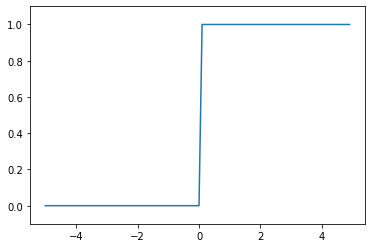

In [ ]:
import matplotlib.pyplot as plt 

def step_function(x):
    return np.array(x > 0, dtype=int) # x가 들어가면 x > 0에서 bool형태로 나오는데 / 이것들을 int로 변환해서 넘파이 배열 형태로 반환 => 1,0 두 개로 이루어짐

x = np.arange(-5.0, 5.0, 0.1) 
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) 
plt.show()

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 3.2.4 시그모이드 함수 구현하기

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

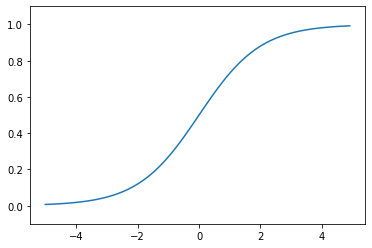

In [ ]:
x = np.arange(-5.0, 5.0, 0.1) 
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수의 비교

- 두 함수의 다른 점과 공통점은??
- 매끄러움의 차이.
- 퍼셉트론에서는 뉴런 사이에 0,1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다
- 둘다 입력이 중요하면 큰 값을 출력하고 중요하지 않으면 작은 값을 출력.
- 입력이 아무리 작거나 커도 출력은 0에서 1사이

### 3.2.6 비선형 함수

- 계단/ 시그모이드 함수 둘다 비선형 함수
- 함수의 출력이 입력의 상수배만큼만 변하는 함수는 선형 함수 = f(x) = ax + b, 1개의 직선
- 선형이 아닌 함수 = 비선형 함수 = 직선 1개로 그릴 수 없는 함수

- 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다 = 선형 함수를 사용해서는 안된다

  => 왜 선형 함수는 안될까?? 

  => 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문 = 층을 아무리 깊게 해도 은닉층이 없는 네트워크로 기능함
  <br/>
  ex) 일차 함수를 아무리 쌓고 연결해도 결국엔 일차 함수다.

  선형함수 h(x) = cx 를 활성화 함수로 사용한 3층 네트워크

  y(x) = h(h(h(x))) = c\*c\*c\*x = c**3 = ax

  곱셈을 3번 하지만 결국 처음 식과 같은 형태이다.

### 3.2.7 ReLU 함수


![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcV0oqo%2FbtqZ9Cd5jTn%2Foee1wFAXtJoWXtvdm9AlYk%2Fimg.png)

In [ ]:
def relu(x):
    return np.maximum(0,x)

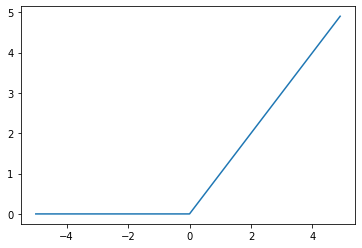

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x,y)
plt.show()

## 3.3 다차원 배열의 계산

- 넘파이의 다차원 배열을 사용한 계산법에 익숙해져야 신경망을 구현하고 이해하는데 도움이 된다

### 3.3.1 다차원 배열

- 다차원 배열 = 숫자의 집합

In [ ]:
# 1차원 배열
A = np.array([1,2,3,4])
A

array([1, 2, 3, 4])

In [ ]:
np.ndim(A) # 배열의 차원수는 np.ndim()으로 확인 가능

1

In [ ]:
A.shape

(4,)

In [ ]:
A.shape[0]

4

In [ ]:
a = np.zeros([16,32,32]) # 3차원 배열을 만듬
np.ndim(a) # 차원수 확인 => 3차원 

3

In [ ]:
# 2차원 배열 
B = np.array([[1,2], [3,4], [5,6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
np.ndim(B), B.shape # (3, 2)의 2차원 배열 => 3행(row) 2열(col)의 행렬(Matrix)

(2, (3, 2))

### 3.2.2 행렬의 곱

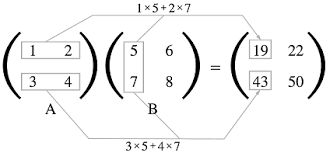


- 왼쪽 행렬의 행(가로)과 오른쪽 행렬의 열(세로)을 원소별로 곱하여 더한다.

- numpy의 dot함수 이용하면 쉽게 곱셈가능

In [ ]:
# 2x2, 2x2 행렬 곱 연산
A, B = np.array([[1,2], [3,4]]), np.array([[5,6], [7,8]])
A.shape, B.shape

((2, 2), (2, 2))

In [ ]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

- np.dot()은 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산한다.
- np.dot(A,B)와 np.dot(B,A)는 다른 값이 될 수도 있다 => 행렬 곱에서 순서는 중요


In [ ]:
# 2x3, 3x2 행렬 곱 연산
A, B = np.array([[1,2,3], [4,5,6]]), np.array([[1,2], [3,4], [5,6]])
A.shape, B.shape

((2, 3), (3, 2))

In [ ]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [ ]:
np.dot(B,A)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

- 이렇게 np.dot(A,B)와 np.dot(B,A)는 값이 다를 수 있음. 계산 순서가 중요함



행렬의 곱에서 주의해야 할 점

- 행렬의 형상(shape)에 주의 해야 함

- 대응하는 차원의 원소 수를 일치시켜야 함 (그렇지 않으면 오류 출력)

- 서로 차원이 다를 때에도 원칙은 똑같이 적용됨

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fl48ef%2FbtqZ2bIH5j7%2FISWSGwgkZR5zWw2kpC1nNK%2Fimg.png)

In [ ]:
C = np.array([[1,2], [3,4]])
C.shape, A.shape

((2, 2), (2, 3))

In [ ]:
np.dot(A,C)

ValueError: ignored

- 오류에서 A의 1차원(dim 1)과 C의 0차원(dim 0)의 원소수가 다르다고 함.

In [ ]:
A, B =  np.array([[1,2], [3,4], [5,6]]), np.array([7,8])
A.shape, B.shape

((3, 2), (2,))

In [ ]:
# (3x2) * (2,) = (3,)
np.dot(A,B)

array([23, 53, 83])

### 3.3.3 신경망에서의 행렬 곱

![이미지](https://poddeeplearning.readthedocs.io/ko/latest/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0%20%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94%20%EB%94%A5%EB%9F%AC%EB%8B%9D/3_function_pulpan92_image/image2.png)

- 입력 2개(x1, x2) 들어가서 출력 3개(y1, y2, y3)가 나옴
- 은닉층의 가중치 개수는 둘의 곱??

In [ ]:
X, W = np.array([1,2]), np.array([[1,3,5], [2,4,6]])
X.shape, W.shape

((2,), (2, 3))

In [ ]:
W

array([[1, 3, 5],
       [2, 4, 6]])

In [ ]:
Y = np.dot(X,W)
Y

array([ 5, 11, 17])

## 3.4 3층 신경망 구현하기

![이미지](https://t1.daumcdn.net/cfile/tistory/99651A475A6926431F)

- 3층 신경망에서 수행되는 입력부터 출력까지의 처리(순방향) 구현

### 3.4.1 표기법 설명


![이미지](https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfMTMy/MDAxNTAwOTUzNDUyNDYw.21mnU_78KeAq2uLKFd-4axjt_9E6TF9mOkA8H9tvjxMg.qfxzYjTJpagOg972bkq6Y-4dgCFOULYtrbt95Cl-rkgg.PNG.cjswo9207/fig_3-16.png?type=w2)

### 3.4.2 각 층의 신호 전달 구현하기


![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbeXdv6%2FbtqZ7LvzIcn%2F2uZb9ItCyCyLTYyowlTRu1%2Fimg.png)



각 신경망의 weight 및 뉴런들은 위와 같이 도식화가 가능하다. 

그리고 행렬의 곱을 이용해서 1층의 가중치 부분을 위의 식으로 간소화시킬 수 있다. 



In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 2x3, 입력은 2개, 출력은 3개
B1 = np.array([0.1, 0.2, 0.3]) 
# 편향도 3개 - 출력 개수 따라 가는듯? = 맞음. 출력이란 게 입력과 가중치가 곱해진 값에 편향이 더해진 거니까 
# 출력하나에 하나의 계산이 이루어지고 따라서 출력 개수만큼 편향이 존재한다

X.shape, W1.shape, B1.shape

((2,), (2, 3), (3,))

In [ ]:
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

활성화 함수의 처리를 그림으로 보면 아래와 같다

![이미지](https://poddeeplearning.readthedocs.io/ko/latest/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0%20%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94%20%EB%94%A5%EB%9F%AC%EB%8B%9D/3_function_pulpan92_image/image6.png)

In [ ]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

1층에서 2층으로의 신호 전달은 아래와 같다

![이미지](https://velog.velcdn.com/post-images%2Fdscwinterstudy%2Ff77f36c0-39fd-11ea-9304-8d735a4c8d2b%2F1%EC%B8%B5%EC%97%90%EC%84%9C-2%EC%B8%B5%EC%9C%BC%EB%A1%9C.png)

In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) # 3x2, 입력은 3개, 출력은 2개
B2 = np.array([0.1, 0.2])

Z1.shape, W2.shape, B2.shape

((3,), (3, 2), (2,))

In [ ]:
A2 = np.dot(Z1, W2) + B2 # A2는 입력값과 가중치가 곱해진 값에 각각 편향을 더한 값의 총합, 가중합
Z2 = sigmoid(A2)


마지막으로 2층에서 출력층으로의 신호 전달, 활성화 함수만 지금까지 은닉층과 다르다

![이미지](https://velog.velcdn.com/post-images%2Fdscwinterstudy%2Fe3844950-3a00-11ea-85c7-af1be234c277%2F%EC%B6%9C%EB%A0%A5%EC%B8%B5%EC%9C%BC%EB%A1%9C-%EC%8B%A0%ED%98%B8-%EC%A0%84%EB%8B%AC.png)

In [ ]:
def identity_function(x): # 입력을 그대로 출력하는 항등 함수
    return x 

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3 
Y = identity_function(A3)

- 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 따라 정한다

- 회귀는 항등 함수 / 이진분류는 시그모이드 함수 / 다중 분류는 소프트맥스 함수

### 3.4.3 구현 정리

In [ ]:
def init_network(): # 가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장
    network = {} # 가중치와 편향을 임의의 값으로 지정. 중간의 노드의 개수에 따라 맞게 설정해줌.
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 2x3
    network['b1'] = np.array([0.1, 0.2, 0.3]) # 3,
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) # 3x2
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x): # 입력층에서 x 입력
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1 # 입력된 x와 가중치를 각각 곱하고 편향을 더해줌
    z1 = sigmoid(a1) # 
    a2 = np.dot(z1, W2) + b2 
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3 
    y = identity_function(a3)

    print(a1), print(a2), print(a3)
    return y 

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

[0.3 0.7 1.1]
[0.51615984 1.21402696]
[0.31682708 0.69627909]


array([0.31682708, 0.69627909])

## 3.5 출력층 설계하기

- 회귀는 항등 함수 / 분류는 소프트맥스 or 시그모이드

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

- 항등 함수 : 입력을 그대로 출력. 입력과 출력이 항상 같다
  
  ![이미지](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTsx_W9xsgGl4URSwWB3L_Byco1KQDNyujYg&usqp=CAU)

<br/>

- 소프트맥스

  ![이미지](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRa7PuhUT9G0MYV1AvjCWdMqmQXC8AlkjuYdg&usqp=CAU)

  ![이미지](https://poddeeplearning.readthedocs.io/ko/latest/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0%20%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94%20%EB%94%A5%EB%9F%AC%EB%8B%9D/3_function_pulpan92_image/image7.png)

In [ ]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수 = 분자 
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [ ]:
sum_exp_a = np.sum(exp_a) # 지수 함수의 합 = 분모
sum_exp_a

74.1221542101633

In [ ]:
y = exp_a / sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

softmax()는 오버플로 문제가 있음 - 너무 큰 값을 출력하여 표현할 수 없는 문제

softmax의 지수함수 계산 시 어떤 정수를 더하거나 빼도 결과는 바뀌지 않음

이를 이용하여 분자, 분모 각각에 정수를 더하여 문제 해결

어떤 값이든 상관없지만 오버플로를 막을 목적으로 정수 (C')는 보통 maximum값 이용

아래는 개선한 수식

![이미지](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRkRhHfAeHXYz4N--y7zDlJuAil_1wpUGO5ow&usqp=CAU)

In [ ]:
# 소프트맥스 오버플로 발생 시켜보기
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))
a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([1010, 1000,  990])

In [ ]:
c = np.max(a)
a - c # a중 최대값 빼버리기 

array([  0, -10, -20])

In [ ]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.3 소프트맥스 함수의 특징

- 소프트맥스 함수의 출력은 0과 1사이, 출력의 총합은 1

 => 출력의 총합이 1이다?? => 이 성질로 소프트맥스 함수의 출력을 확률로 해석할 수 있다


- 소프트맥스 적용해도 각 원소의 대소관계는 변하지 않음 (지수함수가 단조증가함수이므로) - 입력값들의 대소관계는 함수를 거쳐도 똑같다

- 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다 => 결과적으로 소프트맥스 함수는 생략 가능함 (추론단계에서)

- 신경망 학습 시에는 출력층에서 소프트맥스 함수 사용함.

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
y

array([0.01821127, 0.24519181, 0.73659691])

In [ ]:
np.sum(y)

1.0

### 3.5.4 출력층의 뉴런 수 정하기

- 출력층의 뉴런 수는 문제에 맞게 적절하게 정해야 한다.
- 분류에서는 분류하고 싶은 클래수 수로 설정

## 3.6 손글씨 숫자 인식
- 이미 학습된 매개변수를 사용해 학습 과정은 생략, 추론 과정만 구현
- 추론 과정을 신경망의 순전파라 함

### 3.6.1 MNIST 데이터셋

- 0~9까지 10개 숫자 이미지로 구성 / 훈련용 60000장, 시험용 10000장
- 28x28

In [ ]:
!pip install pillow

In [ ]:
from PIL import Image
import pickle
import numpy as np 
import matplotlib.pylab as plt
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 책 코드랑 다르게 씀. 책에서는 Flatten 시켜서 가져오는데... 굳이?? => 아 나중에 추론할때 바로 넣을라고 Flatten시켜서 가져온거구나
# 나는 데이터를 다르게 가져와서 Flatten이 없어서 reshape로 shape 맞춰줌

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# 넘파이 형태의 이미지를 PIL을 사용하여 시각화
img = x_train[1]
Image.fromarray(img)

In [ ]:
# PIL을 이용한 시각화 함수  
def img_show(img): # img는 28x28 넘파이 배열 
    pil_img = Image.fromarray(img)
    return pil_img

img_show(x_train[100])

In [ ]:
y_train[100]

5

### 3.6.2 신경망의 추론 처리

- 추론을 수행하는 신경망 구현
- 입력층 뉴런은 784개 / 출력층 뉴런은 10개
- 은닉층은 총 두 개 / 첫번째 은닉층 노드는 50개, 두번째 은닉층 노드는 100개

In [ ]:
def get_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_test = x_test/255.0
    x_test = x_test.reshape(-1, 784)
    return x_test, y_test 

def init_network():
    with open('/content/deep-learning-from-scratch/ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']  

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [ ]:
network.keys()

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])

In [ ]:
network['W1'].shape, network['W2'].shape, network['W3'].shape # 보면 50, 100 이렇게 노드의 개수가 동일함을 볼수 있다.

((784, 50), (50, 100), (100, 10))

In [ ]:
x, t = get_data()
network = init_network()
x[1000].shape

(784,)

In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)): # len(x) : 테스트 이미지 개수, 10000번 for문을 돌면서 predict함수에 이미지가 Flatten된 형태로 한장씩 들어감
    y = predict(network, x[i]) # 미리 학습된 가중치와 편향에 테스트 이미지를 넣어서 계산, 다 거치고 최종적으로 10개 라벨에 대한 확률값들이 나옴
    p = np.argmax(y) # 그 확률 중에서 가장 높은 것의 인덱스를 뽑아옴. 인덱스가 곧 이미지 라벨이므로
    if p == t[i]: # 만약 이미지의 예측 라벨과 정답 라벨이 같다면 
        accuracy_cnt += 1 # 정확도 카운트에 1 추가 / accuracy_cnt : 맞춘 이미지 개수

print('Accuracy : ' + str(float(accuracy_cnt) / len(x))) # 맞춘 이미지 개수 / 전체 이미지 개수 = 정확도

Accuracy : 0.9352


- get_data에서 정규화를 안 할경우 :

 /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp

  => 오버플로 발생
  
  => Accuracy : 0.9207

<br/>

- get_data에서 정규화를 해줄 경우:

  => Accuracy : 0.9352, 오버플로 해결 및 성능향상

- 데이터를 특정 범위로 변환하는 처리를 정규화(Normalization)

- 신경망 입력 데이터에 특정 변환을 가하는 것을 전처리(Pre-processing)이라 한다

- 여기서는 각 픽셀 값들을 255로 나누는 단순한 정규화를 했지만, 실제로는 데이터 전체의 분포를 고려해 전처리한다. 

  => ex) z-score 표준화(평균, 표준편차를 이용해 데이터들이 0을 중심으로 분포), 데이터의 확산 범위를 제한하는 정규화, 데이터 백색화 등등

### 3.6.3 배치 처리

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FrrdBs%2FbtqZ2cnEb7f%2FzsUGkDGBBRJZg9fMFRPuAk%2Fimg.png)

배치처리 - 이미지 여러 개를 한꺼번에 묶어 넘기는 것

배치(batch) - 하나로 묶은 입력 데이터

- 왜 배치 처리를 하는가?? 

  => 컴퓨터로 계산시 큰 이점을 준다. 이미지 1장당 처리 시간을 대폭 줄여준다

  1. 먼저 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화되어 있기 때문이고 
  
  2. 두번째는 큰 신경망에서 데이터 전송이 병목으로 작용할 수 있는데 배치 처리를 함으로 버스에 주는 부하를 줄여주는 것이다.

  => 배치 처리를 수행함으로 큰 배열로 이뤄진 계산을 하게 되는데, 컴퓨터는 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러번 계산하는 것보다 빠르다

In [ ]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
x.shape, x[0].shape, W1.shape, W2.shape, W3.shape

((10000, 784), (784,), (784, 50), (50, 100), (100, 10))

In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size): # 0에서 10000까지 batch_size 간격으로 for문을 돌림
    x_batch = x[i:i + batch_size] # x[i:i+batch_size] : 입력 데이터의 i번째 부터 i + batch_size번째까지 데이터를 묶음 / x[0:100], x[100:200]...
    # print(x_batch.shape)
    y_batch = predict(network, x_batch)
    # print(y_batch.shape)
    p = np.argmax(y_batch, axis=1) # argmax에서 axis=1 추가된 것 주의. 100x10의 배열 중 1번째 차원을 구성하는 각 원소에서 1번째 차원을 축으로 최댓값의 인덱스를 뽑음
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) # ==이용해서 넘파이 배열끼리 비교하여 bool배열 만들고, 이 결과 배열에서 True가 몇개인지 셈

print('Accuracy : ' + str(float(accuracy_cnt) / len(x)))

Accuracy : 0.9352


In [ ]:
list(range(0,10)), list(range(0,10,3))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 3, 6, 9])

In [ ]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
z = np.argmax(x, axis=0)
x.shape, y, z 

((4, 3), array([1, 2, 1, 0]), array([3, 0, 1]))

In [ ]:
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])
y==t

array([ True,  True, False,  True])

In [ ]:
np.sum(y==t) # y랑 t에서 같은게, 조건을 만족하는게 3개

3

## 3.7 정리


- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.